In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
#随机设置3个簇的质心
blob_centers = np.array(
    [[-0.4,2.2],
     [-1.5,2.8],
     [-2.8,1.8]
    ])
#3个簇的标准差
blob_std =np.array([0.4,0.3,0.3])
#为聚类产生一个数据集和相应的标签
X,y = make_blobs(n_samples=500,centers=blob_centers,
                     cluster_std = blob_std,random_state=7)
def plot_clusters(X, y=None):
#显示数据集
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

<Figure size 800x400 with 1 Axes>

In [2]:
def plot_centroids(centroids, weights=None, circle_color='w', \
                   cross_color='k'):
    #显示质心点
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

C:\Users\lilin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lilin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


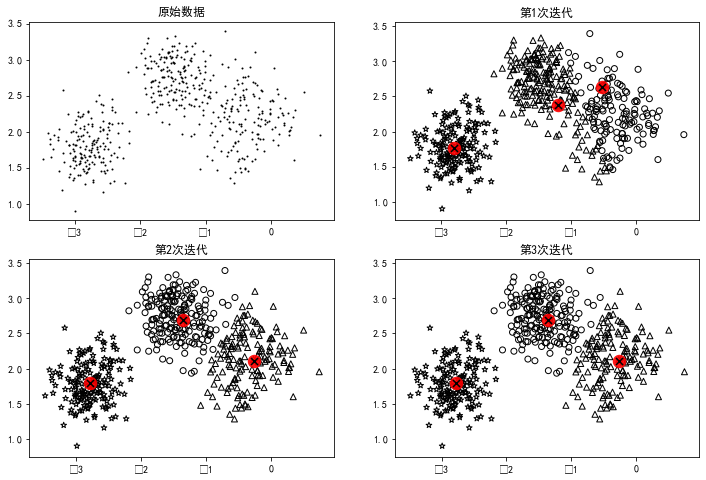

In [3]:
from sklearn.cluster import KMeans
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
k = 3
#创建3个kmeans模型，分别执行1次，2次，3次迭代
kmeans_iter1 = KMeans(n_clusters = 3,init = 'random',
                      n_init = 1,max_iter=1,random_state=1).fit(X)
kmeans_iter2 = KMeans(n_clusters = 3,init = 'random',
                      n_init = 2,max_iter=1,random_state=1).fit(X)
kmeans_iter3 = KMeans(n_clusters = 3,init = 'random',
                      n_init = 3,max_iter=1,random_state=1).fit(X)
#显示聚类效果
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('原始数据')
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
mValue = ['^','o','*']
plt.subplot(222)
plt.title('第1次迭代')
for label in range(0,k):
    XX=X[kmeans_iter1.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label],c='',\
                edgecolors='k')
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', \
               cross_color='k')
plt.subplot(223)
plt.title('第2次迭代')
for label in range(0,k):
    XX=X[kmeans_iter2.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label],c='',\
                edgecolors='k')
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='r',\
               cross_color='k')
plt.subplot(224)
plt.title('第3次迭代')
for label in range(0,k):
    XX=X[kmeans_iter3.labels_==label]
    plt.scatter(XX[:, 0], XX[:, 1], marker=mValue[label],c='',\
                edgecolors='k')
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', \
               cross_color='k')

In [68]:
kmeans_iter1.inertia_

165.33784324265721

In [69]:
kmeans_iter2.inertia_

99.91067127703192

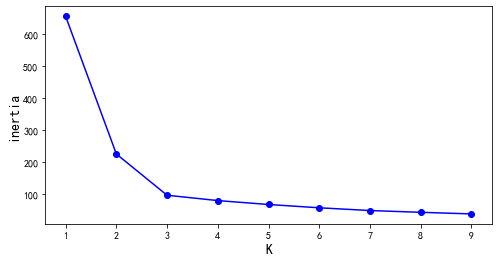

In [83]:
#建立聚类模型，K值变化范围：1-9，用来对比inertia属性
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8,4))
plt.xlabel("K", fontsize=14)
plt.ylabel("inertia", fontsize=14)
plt.plot(range(1,10),inertias,'bo-')
plt.show()

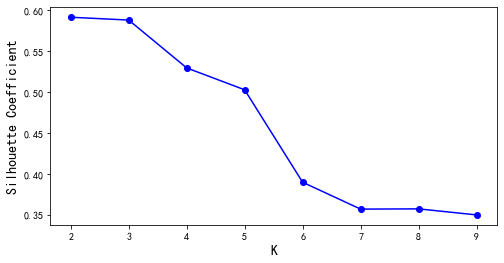

In [86]:
#导入轮廓系数的相关库
from sklearn.metrics import silhouette_score
#对比K取值1-9，观察轮廓系数变化
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8,4))
plt.xlabel("K", fontsize=14)
plt.ylabel("Silhouette Coefficient", fontsize=14)
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.show()